In [83]:
import os
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [84]:
path = "/Users/tanny/Documents/Projects/CULI Scoring/saves/"
cefr_label_path = "/Users/tanny/Documents/Projects/CULI Scoring/main/assets/cefr_label.csv"

In [85]:
metrics = []
predictions = []

for file in os.listdir(path):
    if file.endswith("metrics.json"):
        metrics.append(os.path.join(path, file))
    elif file.endswith("predictions.csv"):
        predictions.append(os.path.join(path, file))

In [86]:
def read_json(json_path) -> pd.DataFrame:
    with open(json_path, "r") as f:
        return pd.DataFrame(json.load(f))

def read_csv(csv_path) -> pd.DataFrame:
    return pd.read_csv(csv_path)

def visualize_metrics(metrics: str) -> None:
    plt.style.use('dark_background')
    data = read_json(metrics)
    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.plot(data["epoch"], data["train_loss"], label="Train Loss")
    plt.plot(data["epoch"], data["val_loss"], label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Over Epochs: {os.path.basename(metrics)}")
    plt.legend()
    plt.show()
        # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(data["epoch"], data["train_acc"], label="Train Accuracy")
    plt.plot(data["epoch"], data["val_acc"], label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Over Epochs: {os.path.basename(metrics)}")
    plt.legend()
    plt.show()

def get_max_score(data: pd.DataFrame, column: str) -> float:
    max_score = 0.0
    if column in data.columns:
        max_score = max(max_score, data[column].max())
    return max_score

def visualize_confusion_matrix(predictions: str, true_col: str, pred_col: str, label_map: pd.DataFrame) -> None:
    data = read_csv(predictions)

    key_to_label = dict(zip(label_map["key"], label_map["value"]))
    data[true_col] = data[true_col].map(key_to_label)
    data[pred_col] = data[pred_col].map(key_to_label)

    y_true = data[true_col]
    y_pred = data[pred_col]

    labels = list(label_map["value"])
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix for {true_col} vs {pred_col} in {os.path.basename(predictions)}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

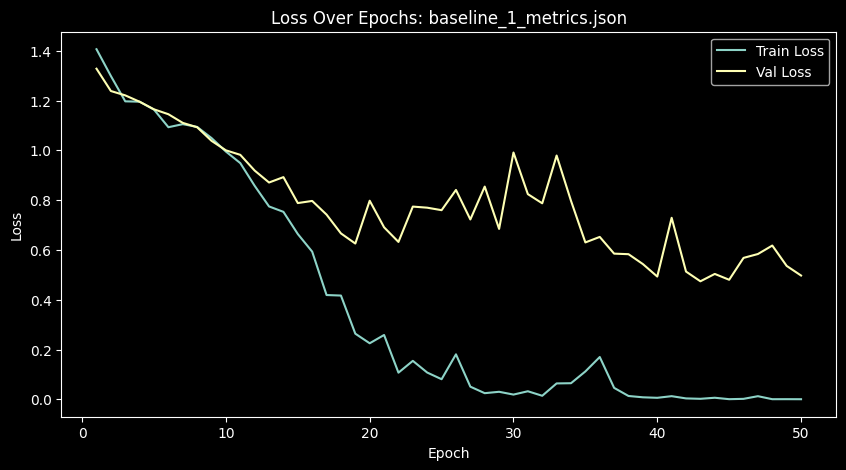

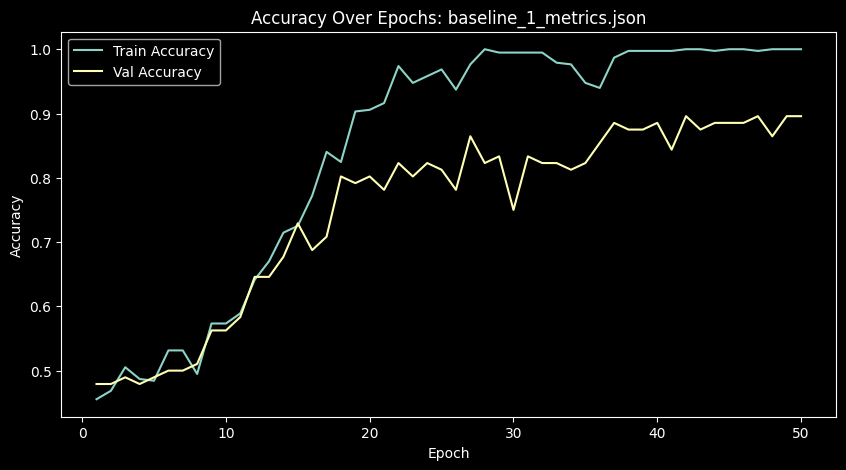

Max validation accuracy for baseline_1_metrics.json: 0.8958


In [87]:
for i in metrics:
    visualize_metrics(i)
    max_score = get_max_score(read_json(i), "val_acc")
    print(f"Max validation accuracy for {os.path.basename(i)}: {max_score:.4f}")

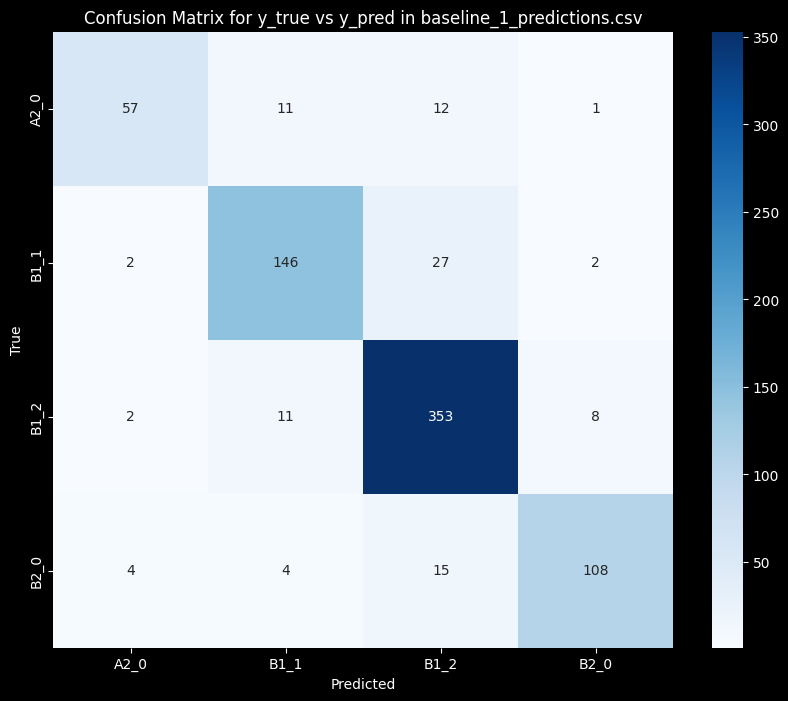

In [88]:
cefr_label_map = pd.DataFrame({
    "key": [0, 1, 2, 3],
    "value": ["A2_0", "B1_1", "B1_2", "B2_0"]
})

for i in predictions:
    visualize_confusion_matrix(i, "y_true", "y_pred", cefr_label_map)

In [91]:
def overview_predictions(data: pd.DataFrame, categorical_cols: list[str] = []) -> None:
    data = pd.DataFrame.copy(data)
    pred_col = "y_pred"
    true_col = "y_true"
    for categorical_col in categorical_cols:
        all_cat = data[categorical_col].unique()
        for catt in all_cat:
            if categorical_col in data.columns:
                cat = data.loc[data[categorical_col] == catt, :]
                print(f"Overview of {categorical_col}: {(cat[pred_col] == cat[true_col]).value_counts()}")

prediction_df = pd.read_csv(predictions[0])
overview_predictions(prediction_df, ['region', 'task'])

Overview of region: True     96
False    18
Name: count, dtype: int64
Overview of region: True     69
False     1
Name: count, dtype: int64
Overview of region: True     75
False    12
Name: count, dtype: int64
Overview of region: True     78
False     6
Name: count, dtype: int64
Overview of region: True     66
False    14
Name: count, dtype: int64
Overview of region: True     39
False     6
Name: count, dtype: int64
Overview of region: True     74
False    20
Name: count, dtype: int64
Overview of region: True     97
False    14
Name: count, dtype: int64
Overview of region: True     30
False     1
Name: count, dtype: int64
Overview of region: True     40
False     7
Name: count, dtype: int64
Overview of task: True     162
False     23
Name: count, dtype: int64
Overview of task: True     170
False     20
Name: count, dtype: int64
Overview of task: True     172
False     27
Name: count, dtype: int64
Overview of task: True     160
False     29
Name: count, dtype: int64
